In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [135]:
df = pd.read_csv("Real estate.csv").drop(columns=["No"])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


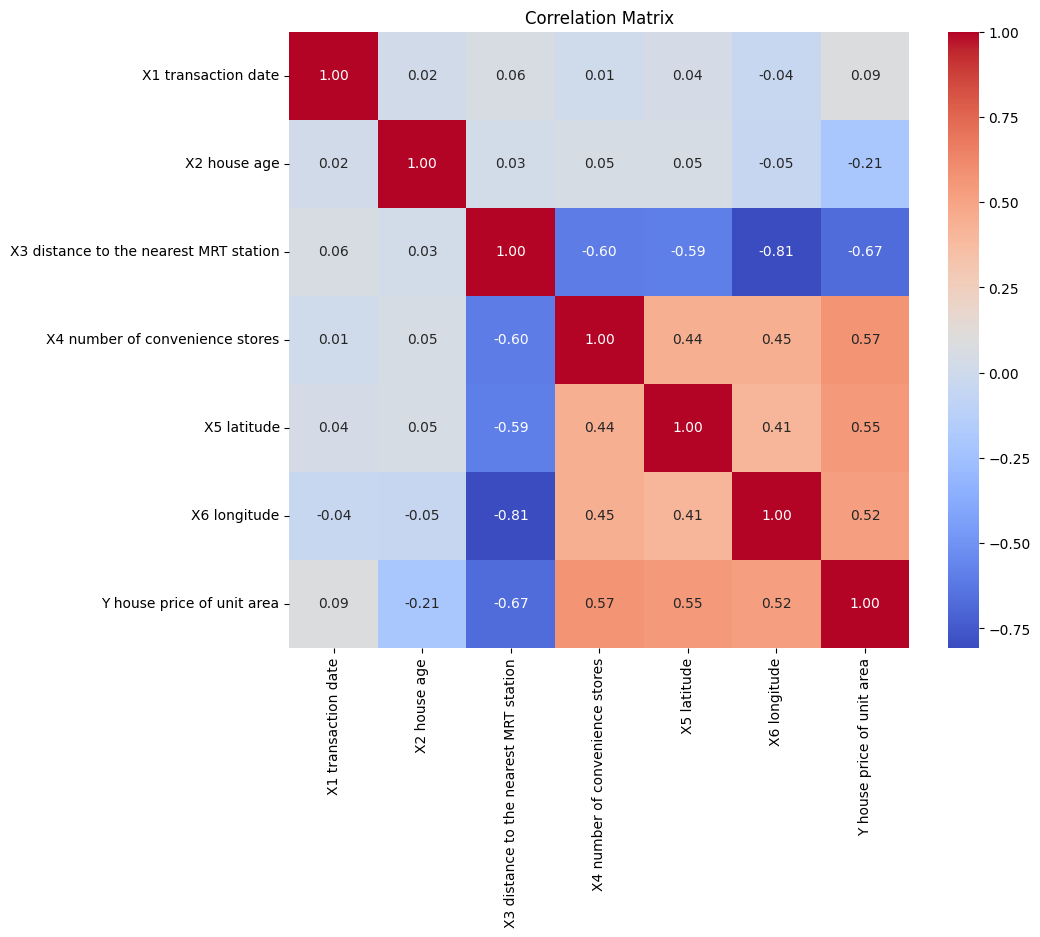

In [137]:
corr = df.corr()
# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [144]:
df.drop(columns=["X6 longitude"], inplace=True)

In [145]:
X = df.drop(columns=["Y house price of unit area"]).values
y = df["Y house price of unit area"].values

In [146]:
class MyLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None  # weights (including bias)

    def fit(self, X, y):
        # Add bias column
        X = np.c_[np.ones(X.shape[0]), X]  
        n_samples, n_features = X.shape
        
        # Initialize weights
        self.w = np.zeros(n_features)
        
        # Gradient descent
        for _ in range(self.epochs):
            y_pred = X @ self.w
            error = y_pred - y
            grad = (2 / n_samples) * (X.T @ error)
            self.w -= self.lr * grad

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.w

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
# ---- Train sklearn LinearRegression ----
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_sklearn = lr.predict(X_test)

In [149]:
# ---- Train your scratch model ----
model = MyLinearRegression(lr=0.01, epochs=3000)
model.fit(X_train, y_train)
y_pred_scratch = model.predict(X_test)

In [150]:
def regression_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adj_r2 = 1 - (1-r2) * (n-1)/(n-n_features-1)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2, "Adj R²": adj_r2}

# ---- Evaluate both ----
print("Scratch model:", regression_metrics(y_test, y_pred_scratch, X_test.shape[1]))
print("Sklearn model:", regression_metrics(y_test, y_pred_sklearn, X_test.shape[1]))

Scratch model: {'MSE': 53.165124602395636, 'RMSE': 7.291441874032572, 'MAE': 5.297182067340123, 'R²': 0.6830877112120408, 'Adj R²': 0.6625089911608746}
Sklearn model: {'MSE': 53.16512460300065, 'RMSE': 7.291441874074061, 'MAE': 5.297182067434455, 'R²': 0.6830877112084344, 'Adj R²': 0.662508991157034}
